In [43]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""

import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [44]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

# Lets see if we can Find Clusters in my IMDB Ratings Dataset.

In [180]:
path = '/Users/apple/Desktop/DS/Datasets/imdb_ratings.csv'

import os
from pathlib import Path

In [175]:
print(Path.cwd())
print(Path.home())

/Users/apple/Desktop/DS/Basic_ML_Algos./K-Means_Clustering
/Users/apple


In [355]:
data = pd.read_csv(path, engine='python')

In [356]:
data.describe(include='all')

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
count,301,301.000000,301,301,301,301,301.000000,301.000000,301.000000,301,3.010000e+02,300,258
unique,301,NaN,126,301,301,6,NaN,NaN,NaN,145,NaN,290,203
top,tt3183660,NaN,2016-04-27,Before Sunrise,https://www.imdb.com/title/tt0470752/,movie,NaN,NaN,NaN,"Comedy, Drama",NaN,2018-06-28,Christopher Nolan
freq,1,NaN,32,1,1,250,NaN,NaN,NaN,26,NaN,2,6
mean,NaN,7.996678,NaN,NaN,NaN,NaN,7.882060,116.229236,2008.328904,NaN,2.971019e+05,NaN,NaN
std,NaN,0.939852,NaN,NaN,NaN,NaN,0.696235,61.651688,12.819313,NaN,3.445646e+05,NaN,NaN
min,NaN,5.000000,NaN,NaN,NaN,NaN,5.600000,6.000000,1931.000000,NaN,3.300000e+01,NaN,NaN
25%,NaN,8.000000,NaN,NaN,NaN,NaN,7.500000,98.000000,2007.000000,NaN,4.267900e+04,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN,7.900000,115.000000,2013.000000,NaN,1.852270e+05,NaN,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,8.300000,132.000000,2016.000000,NaN,4.329790e+05,NaN,NaN


In [510]:
data_film

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Clusters
0,tt1010048,8,2016-10-18,Slumdog Millionaire,https://www.imdb.com/title/tt1010048/,movie,8.0,120,2008,"Drama, Romance",733122,2008-08-30,"Loveleen Tandan, Danny Boyle",4
2,tt1022603,8,2016-12-17,(500) Days of Summer,https://www.imdb.com/title/tt1022603/,movie,7.7,95,2009,"Comedy, Drama, Romance",432979,2009-01-17,Marc Webb,1
3,tt1024648,8,2016-04-27,Argo,https://www.imdb.com/title/tt1024648/,movie,7.7,120,2012,"Biography, Drama, Thriller",525225,2012-08-31,Ben Affleck,1
4,tt1028532,8,2016-09-01,Hachi: A Dog's Tale,https://www.imdb.com/title/tt1028532/,movie,8.1,93,2009,"Drama, Family",216392,2009-06-13,Lasse Hallstr�m,1
5,tt1033575,8,2016-12-17,The Descendants,https://www.imdb.com/title/tt1033575/,movie,7.3,115,2011,"Comedy, Drama",221377,2011-09-02,Alexander Payne,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,tt0970179,8,2018-01-04,Hugo,https://www.imdb.com/title/tt0970179/,movie,7.5,126,2011,"Adventure, Drama, Family, Fantasy, Mystery, Ro...",280029,2011-10-10,Martin Scorsese,1
297,tt0097165,10,2016-04-27,Dead Poets Society,https://www.imdb.com/title/tt0097165/,movie,8.1,128,1989,"Comedy, Drama",355592,1989-06-02,Peter Weir,2
298,tt0986264,8,2016-09-01,Taare Zameen Par,https://www.imdb.com/title/tt0986264/,movie,8.4,165,2007,"Drama, Family",135043,2007-12-21,"Aamir Khan, Amole Gupte",1
299,tt0098635,8,2018-12-22,When Harry Met Sally...,https://www.imdb.com/title/tt0098635/,movie,7.6,95,1989,"Comedy, Drama, Romance",173606,1989-07-12,Rob Reiner,1


In [357]:
data.head(2)

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt1010048,8,2016-10-18,Slumdog Millionaire,https://www.imdb.com/title/tt1010048/,movie,8.0,120,2008,"Drama, Romance",733122,2008-08-30,"Loveleen Tandan, Danny Boyle"
1,tt0101049,8,2016-10-18,A Bit of Fry and Laurie,https://www.imdb.com/title/tt0101049/,tvSeries,8.3,30,1987,Comedy,8260,1987-12-26,NaN


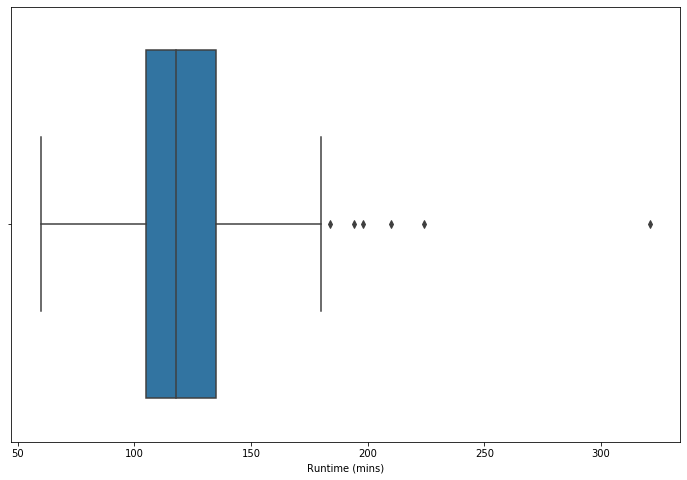

In [218]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Runtime (mins)', data = data_film)

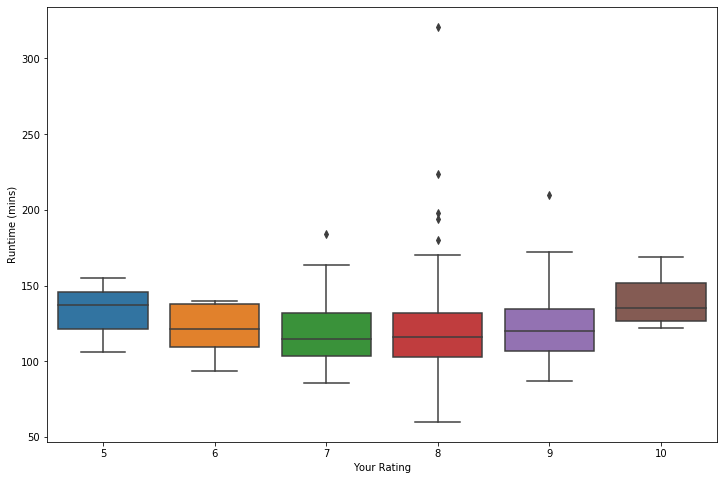

In [220]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Your Rating', y = 'Runtime (mins)', data = data_film)

#### Lets check if there is a linear relationship between my rating and runtime

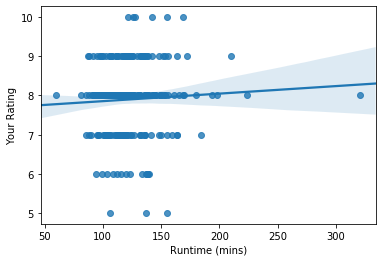

In [222]:
sns.regplot(y = 'Your Rating', x = 'Runtime (mins)', data = data_film)
# No SIgnificant Relationship

#### Lets check if there is a linear relationship between my rating and IMDB rating

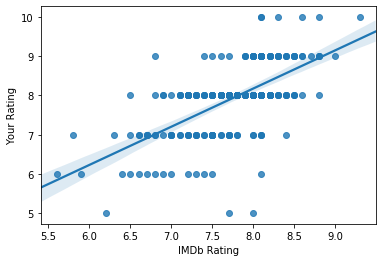

In [224]:
sns.regplot(y = 'Your Rating', x = 'IMDb Rating', data = data_film)
# Very strong Positive relationship. Not a hipster after all.

#### Lets check if there is a linear relationship between my rating and Year of films release.

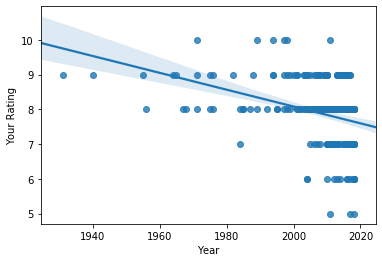

In [226]:
sns.regplot(y = 'Your Rating', x = 'Year', data = data_film)

#### Insight: I tend to rate older movies highly and newer movies worse.

#### Lets check if there is a linear relationship between my rating and The number of votes/Popularity.

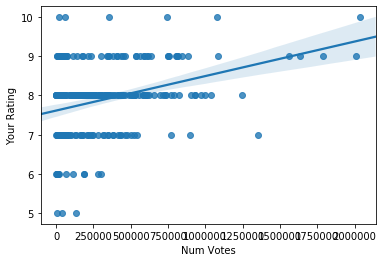

In [227]:
sns.regplot(y = 'Your Rating', x = 'Num Votes', data = data_film)

#### Insight: Popular movies tend to get rated higher, decent positive trend.

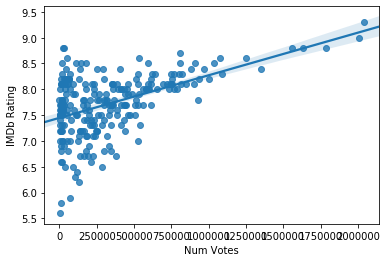

In [228]:
sns.regplot(y = 'IMDb Rating', x = 'Num Votes', data = data_film)

#### Getting Data for Clustering, Need a feature vector (starting with two simple Feature)
#### 1. Clustering Based on runtime and runtime. Lets see If I give tend to give a certain rating to movies of a certain length.

#### Lets first filter only movies 

In [358]:
# create filter 

film_filt = (data['Title Type'] == 'movie')

# getting film data using loc indexer 
# syntax .loc[condition in form of df['']== , list of columns you want displayed]

data_film = data.loc[(film_filt)]

In [359]:
# 250 Movies 
data_film.describe()

,Your Rating,IMDb Rating,Runtime (mins),Year,Num Votes
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,7.896000,7.712400,122.052000,2007.660000,3.210570e+05
std,0.912422,0.588619,26.250135,13.661734,3.532972e+05
min,5.000000,5.600000,60.000000,1931.000000,3.300000e+01
25%,7.000000,7.400000,105.000000,2006.000000,4.887300e+04
50%,8.000000,7.800000,118.000000,2012.000000,2.224305e+05
75%,8.000000,8.100000,135.000000,2016.000000,4.596830e+05
max,10.000000,9.300000,321.000000,2018.000000,2.039088e+06


#### Comparing BoxPlots

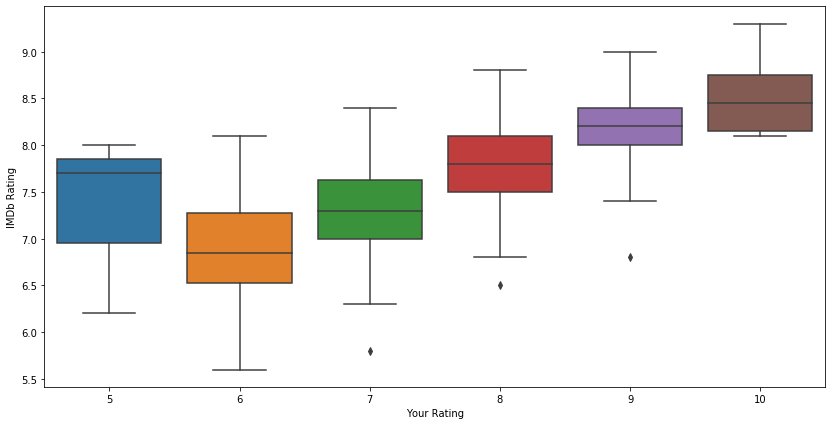

In [216]:
plt.figure(figsize=(14,7))
sns.boxplot(x = 'Your Rating', y = 'IMDb Rating', data = data_film)
#sns.boxplot(x = 'IMDb Rating', data = data_film, color = 'gray')

#### Insight: I generally follow the same tresnds as the IMDb ratings. The movies I've rated the highest tend to be highly rated movies in general. There is a large percentage of movies I've rated lower that the IMDb public likes.

#### Lets just plot the features and try and find clusters.

Text(0, 0.5, 'Rating')

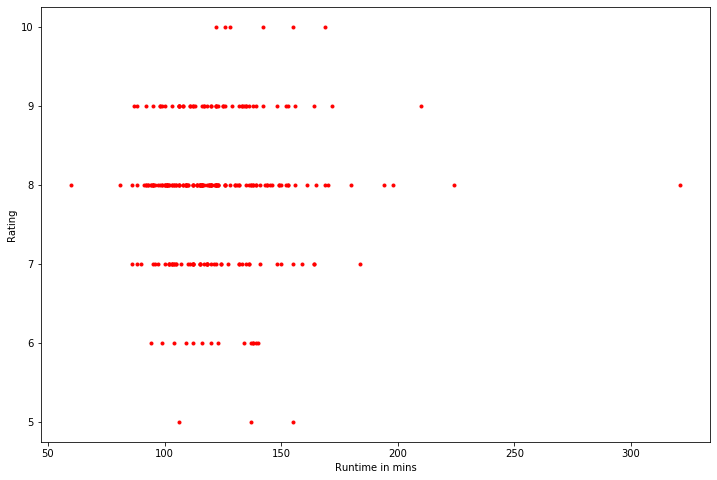

In [217]:
plt.figure(figsize=(12,8))
plt.plot( data_film['Runtime (mins)'], data_film['Your Rating'].to_list(), 'r.')
plt.xlabel('Runtime in mins')
plt.ylabel('Rating')

### Getting the features for the clustering (using Runtime and My Ratings)
Coverting DF to dict, and using the given helper function.

In [360]:
film_dict = data_film.to_dict()

In [361]:
film_dict.keys()

dict_keys(['Const', 'Your Rating', 'Date Rated', 'Title', 'URL', 'Title Type', 'IMDb Rating', 'Runtime (mins)', 'Year', 'Genres', 'Num Votes', 'Release Date', 'Directors'])

In [474]:
feature_1 = 'Runtime (mins)'
feature_2 = 'Your Rating'
feature_3 = 'Year'
feature_4 = 'IMDb Rating'
feature_5 = 'Num Votes'
# poi is supposed to be target for helper, here dummy column

poi = 'Const'

# Ge list 2D array of rows with the features - [[feature_1, feature_2]]

In [363]:
# Adding all film runtimes to list, sure there is a better way.
run_time = []
for i in film_dict[feature_1]:
    run_time.append(film_dict[feature_1][i])

In [364]:
# Adding all your ratings to list, sure there is a better way.

y_rating = []
for i in film_dict[feature_2]:
    y_rating.append(film_dict[feature_2][i])

In [365]:
# year to list 

year = []
for i in film_dict[feature_3]:
    year.append(film_dict[feature_3][i])

In [475]:
# IMDb Rating to list 

imdb_rate = []
for i in film_dict[feature_4]:
    imdb_rate.append(film_dict[feature_4][i])

In [477]:
# Num of votes to list 

num_votes = []

for i in film_dict[feature_5]:
    num_votes.append(film_dict[feature_5][i])

In [480]:
# Convert to numpy arrays and vstack or concatenate.

run_arr = np.array(run_time)
rat_arr = np.array(y_rating)
year_arr = np.array(year)
imdb_rat_arr = np.array(imdb_rate)
num_votes_arr = np.array(num_votes)

In [481]:
run_arr = run_arr.reshape(-1,1)
rat_arr = rat_arr.reshape(-1,1)
year_arr = year_arr.reshape(-1,1)
imdb_rat_arr = imdb_rat_arr.reshape(-1,1)
num_votes_arr = num_votes_arr.reshape(-1,1)

In [485]:
# hstack to get rows with arrays of [feat 1, feat 2].
movie_features = np.hstack((run_arr, rat_arr, year_arr, imdb_rat_arr, num_votes_arr))

# convert to list of arrays for compatibility with helper function
movie_features_list = list(movie_features)

## Fitting Kmeans - Clustering algo.
1. Scale features first.

## Difficult to Interpret with Runtime and YourRating.
# TO DO:
1. Let's see if changing order of features, affects the clusters (shouldn't since its scaled ?) <b> (No Difference)</b>
2. Add Year feature to the mix.(Now we're Getting interesting Results). 
The clusters are split into : 1 - Highly rated, 3 - moderately rated a low rated movies clusters. <br>
Of the 3 moderately rated clusters, 1- is a cluster of older movies. The rest of the two are look to be seprated based on no. of votes. (not sure.)
3. Lets add more numerical features.( IMDb Rating - can get cluster of movies showing vastly different tastes)(Num Votes to get popularity in the mix.
)

In [473]:
data_film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 300
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Const           250 non-null    object 
 1   Your Rating     250 non-null    int64  
 2   Date Rated      250 non-null    object 
 3   Title           250 non-null    object 
 4   URL             250 non-null    object 
 5   Title Type      250 non-null    object 
 6   IMDb Rating     250 non-null    float64
 7   Runtime (mins)  250 non-null    int64  
 8   Year            250 non-null    int64  
 9   Genres          250 non-null    object 
 10  Num Votes       250 non-null    int64  
 11  Release Date    249 non-null    object 
 12  Directors       250 non-null    object 
 13  Clusters        250 non-null    int32  
dtypes: float64(1), int32(1), int64(4), object(8)
memory usage: 38.3+ KB


In [488]:
from sklearn.preprocessing import MinMaxScaler

# Transforming to scaled features
scaled_mov_features = MinMaxScaler().fit_transform(movie_features_list)

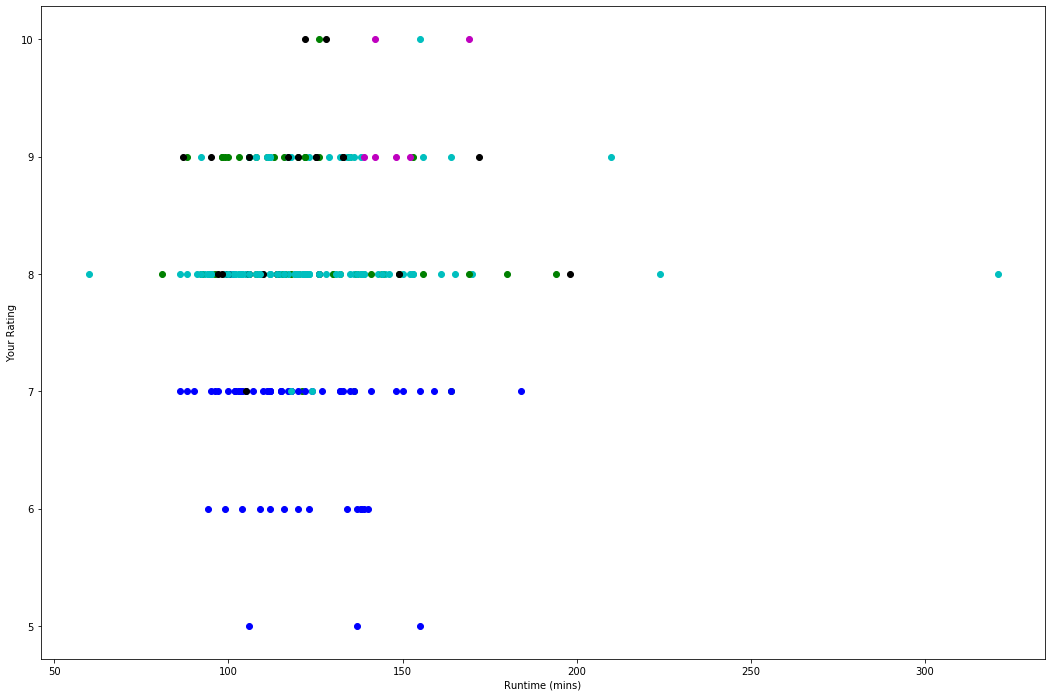

In [491]:
from sklearn.cluster import KMeans

cluster_film = KMeans(n_clusters = 5, n_init=10, max_iter= 100).fit(scaled_mov_features)

pred_film = cluster_film.labels_

plt.figure(figsize=(18,12))

try:
    Draw(pred_film, movie_features_list, poi, mark_poi=False, name="Filmclusters_rating_year_runtime_imdb_numVotes.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")

In [516]:
# Lets get the center of the clusters 
print('Runtime', 'Your Rating','Year','IMDb Rating','Num Votes')
# 5 dimensions for each cluster.
print(cluster_film.cluster_centers_)

Runtime Your Rating Year IMDb Rating Num Votes
[[0.22824302 0.33968254 0.95548258 0.4036894  0.07470704]
 [0.23674829 0.63304348 0.92693653 0.57884841 0.08923739]
 [0.2344131  0.71818182 0.45872518 0.67813268 0.14139224]
 [0.33971903 0.86666667 0.79885057 0.88738739 0.82546931]
 [0.24172762 0.67272727 0.87748171 0.69287469 0.37107101]]


### The splits are still Mostly on the basis of ratings.

### Lets Place the cluster labels back into dataframe and check which Movies got Clustered Together.

In [492]:
data_film['Clusters'] = pred_film

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Investigating Clusters

### The splits are still Mostly on the basis of ratings.

In [493]:
data_film.groupby(['Clusters'])['Your Rating'].size()

Clusters
0     63
1    115
2     22
3      6
4     44
Name: Your Rating, dtype: int64

In [494]:
data_film.groupby(['Clusters'])['Your Rating'].mean()
# A group of movies that is highly rated and a group with low ratings.
# Lets investigate these groups 

Clusters
0    6.698413
1    8.165217
2    8.590909
3    9.333333
4    8.363636
Name: Your Rating, dtype: float64

In [495]:
data_film.groupby(['Clusters'])['Your Rating'].describe()
# Low standard Deviation in ratings, so, probably has clustered some sort of relationship.

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,63.0,6.698413,0.585715,5.0,6.0,7.0,7.00,8.0
1,115.0,8.165217,0.457500,7.0,8.0,8.0,8.00,10.0
2,22.0,8.590909,0.734140,7.0,8.0,9.0,9.00,10.0
3,6.0,9.333333,0.516398,9.0,9.0,9.0,9.75,10.0
4,44.0,8.363636,0.650256,7.0,8.0,8.0,9.00,10.0


In [496]:
# Lets try and visualize the groups 

grouped_df = data_film.groupby(['Clusters'])

clust_0 = grouped_df.get_group(0)
clust_1 = grouped_df.get_group(1)
clust_2 = grouped_df.get_group(2)
clust_3 = grouped_df.get_group(3)
clust_4 = grouped_df.get_group(4)

In [509]:
clust_3.head(10)

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Clusters
10,tt0109830,9,2016-04-27,Forrest Gump,https://www.imdb.com/title/tt0109830/,movie,8.8,142,1994,"Drama, Romance",1558178,1994-06-23,Robert Zemeckis,3
12,tt0111161,10,2017-02-04,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,movie,9.3,142,1994,Drama,2039088,1994-09-10,Frank Darabont,3
23,tt0120815,10,2016-04-27,Saving Private Ryan,https://www.imdb.com/title/tt0120815/,movie,8.6,169,1998,"Drama, War",1076831,1998-07-21,Steven Spielberg,3
37,tt0137523,9,2019-01-07,Fight Club,https://www.imdb.com/title/tt0137523/,movie,8.8,139,1999,Drama,1632082,1999-09-10,David Fincher,3
38,tt1375666,9,2017-05-31,Inception,https://www.imdb.com/title/tt1375666/,movie,8.8,148,2010,"Action, Adventure, Sci-Fi, Thriller",1786270,2010-07-08,Christopher Nolan,3
205,tt0468569,9,2016-04-27,The Dark Knight,https://www.imdb.com/title/tt0468569/,movie,9.0,152,2008,"Action, Crime, Drama, Thriller",2006813,2008-07-14,Christopher Nolan,3


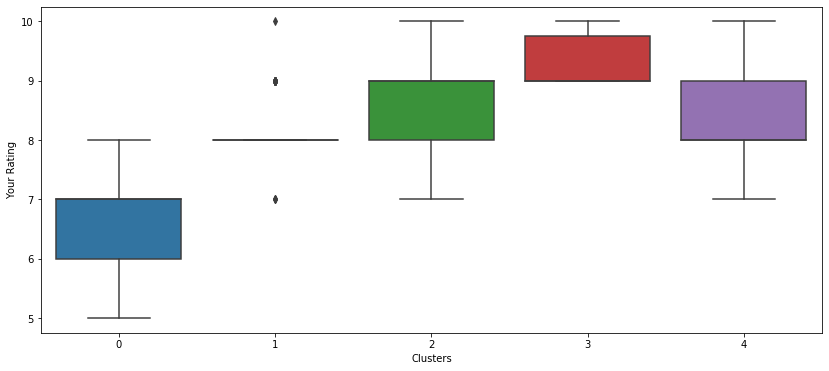

In [498]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Clusters', y = 'Your Rating', data = data_film)

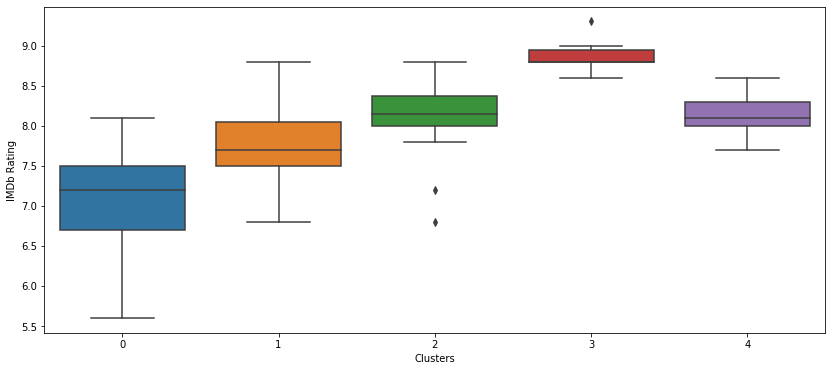

In [499]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Clusters', y = 'IMDb Rating', data = data_film)

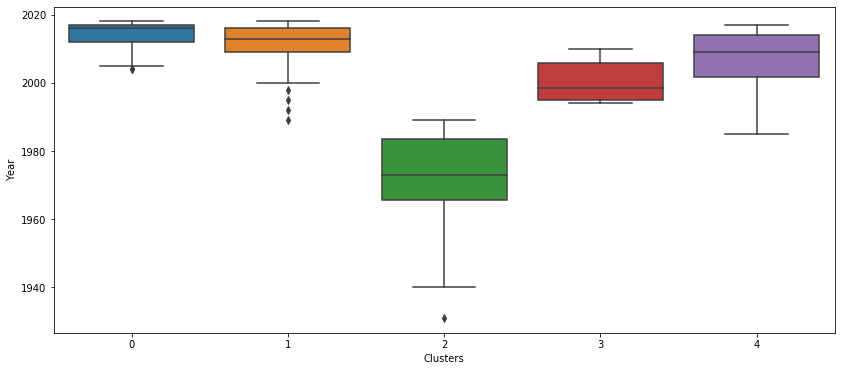

In [500]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Clusters', y = 'Year', data = data_film)

#### Insight: I tend to rate newer movies lower that tend to have higher IMDb scores due to recency bias.

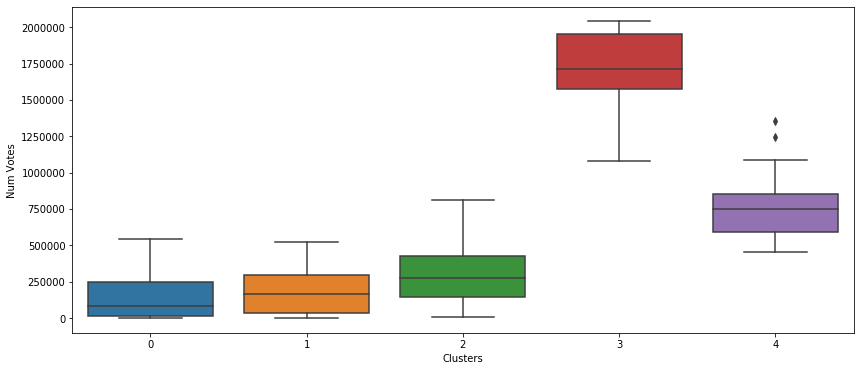

In [501]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Clusters', y = 'Num Votes', data = data_film)